# d1=3

In [2]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import os
import matplotlib.ticker as ptick

## Xエラー

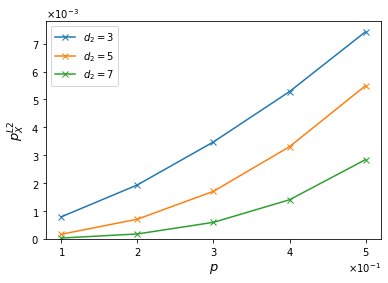

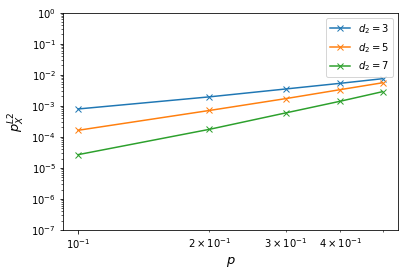

In [4]:
# FUjii-labのパス
path = "/Users/konohideki/Documents/Fujii-lab/surface_realistic/realistic_single_round/SWAP/d1=3,eta=1000"
# ファイル名
file2 = "X error,d2=(3,7,2),eta=1000,trials=10000000,ver0" + ".csv"
########################################

# csvファイルの読み込み
os.chdir(path)
data2 = pd.read_csv(file2, index_col=0)
# データフレームの行名(リスト)を取得
code_distance_list = data2.index
# データフレームの列名(リスト)を取得
p_list = data2.columns
##### グラフ作成 #####

a = np.array(p_list)
a = [float(num) for num in a]
a = np.array(a)

fig, ax = plt.subplots()
for i in range(len(code_distance_list)):
    b = np.array(data2.loc[code_distance_list[i]])
    ax.plot(a, b,marker='x',label=r"$d_{2}=$"+str(code_distance_list[i]))
ax.set_xlabel(r"$p$", fontsize=13)
ax.set_ylabel(r'$p_X^{L2}$', fontsize=13)
ax.set_ylim(0,)
ax.xaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
ax.ticklabel_format(style="sci",  axis="x",scilimits=(0,0))
ax.yaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
ax.ticklabel_format(style="sci",  axis="y",scilimits=(0,0))
ax.set_xticks(a)
ax.legend()

fig, ax = plt.subplots()
for i in range(len(code_distance_list)):
    b = np.array(data2.loc[code_distance_list[i]])
    ax.plot(a, b,marker='x',label=r"$d_{2}=$"+str(code_distance_list[i]))
ax.set_xlabel(r"$p$", fontsize=13)
ax.set_ylabel(r'$p_X^{L2}$', fontsize=13)
ax.set_ylim(0,)
ax.xaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
ax.ticklabel_format(style="sci",  axis="x",scilimits=(0,0))
ax.yaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
ax.ticklabel_format(style="sci",  axis="y",scilimits=(0,0))
ax.set_xticks(a)
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_ylim(0.0000001, 1)
ax.legend()

### 普通の線形回帰

katamuki= [1.39334288]
seppen= -1.7225960755376262
[-7.2959676]
hokan= [5.05862405e-08] 

katamuki= [2.18634062]
seppen= -1.6131550969418578
[-10.35851757]
hokan= [4.38008393e-11] 

katamuki= [3.04117678]
seppen= -1.6366837873800435
[-13.80139089]
hokan= [1.57982546e-14] 

[0.1 0.2 0.3 0.4 0.5] [0.04649796 0.09365944 0.1886554  0.38000291 0.76542845]


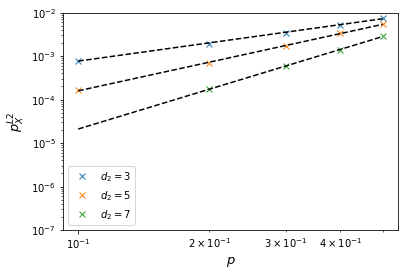

In [5]:
from sklearn import linear_model
clf = linear_model.LinearRegression()

p_list = []

fig, ax = plt.subplots()
for i in range(len(code_distance_list)):
    if i != 2:
        b = np.array(data2.loc[code_distance_list[i]])
        X = np.log10(a).reshape(-1, 1)
        Y = np.log10(b)
        clf.fit(X, Y)
        print("katamuki=", clf.coef_)
        print("seppen=", clf.intercept_)
        print(clf.predict([[-4]]))
        print("hokan=", 10**clf.predict([[-4]]),"\n")
        p_list.append(10**clf.predict([[-4]]))
        ax.plot(a, b,marker='x',label=r"$d_{2}=$"+str(code_distance_list[i]),linewidth=0)
        ax.plot(a, 10**clf.predict(np.log10(a).reshape(-1, 1)),marker='',color="k",linestyle="dashed")
    if i == 2:
        b = np.array(data2.loc[code_distance_list[i]])
        X = np.log10(a[1:]).reshape(-1, 1)
        Y = np.log10(b[1:])
        clf.fit(X, Y)
        print("katamuki=", clf.coef_)
        print("seppen=", clf.intercept_)
        print(clf.predict([[-4]]))
        print("hokan=", 10**clf.predict([[-4]]),"\n")
        p_list.append(10**clf.predict([[-4]]))
        ax.plot(a[1:], b[1:],marker='x',label=r"$d_{2}=$"+str(code_distance_list[i]),linewidth=0)
        ax.plot(a, 10**clf.predict(np.log10(a).reshape(-1, 1)),marker='',color="k",linestyle="dashed")
print(a,10**clf.predict(a.reshape(-1, 1)))
ax.set_xlabel(r"$p$", fontsize=13)
ax.set_ylabel(r'$p_X^{L2}$', fontsize=13)
ax.set_ylim(0,)
ax.xaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
ax.ticklabel_format(style="sci",  axis="x",scilimits=(0,0))
ax.yaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
ax.ticklabel_format(style="sci",  axis="y",scilimits=(0,0))
ax.set_xticks(a)
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_ylim(0.0000001, 0.01)
ax.legend()

[[0.17894174]] [[0.18743165]]


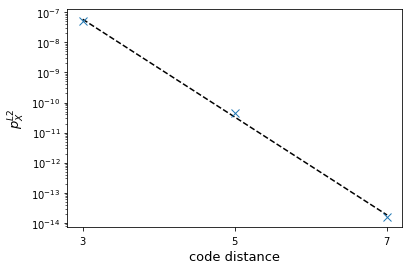

In [6]:
p_list = np.array(p_list)

# fitting
from sklearn import linear_model
clf = linear_model.LinearRegression()
X = np.array(code_distance_list).reshape(-1, 1)
Y = np.log10(p_list)
clf.fit(X, Y)
predict_p = clf.predict([[3],[7]]) 
# モデルの決定
a = clf.coef_
p_th = 10**(-4) / 10**(2*a)
b = clf.intercept_
C = 10**(b-a)
print(p_th, C)
# この式の関数を定義
def pL_X_3(p,code_distance,p_th=p_th,C=C):
    return C*(p/p_th)**((code_distance+1)/2)

##### グラフ作成 #####
fig, ax = plt.subplots()
ax.plot([3,7],10**predict_p,marker='',linestyle="dashed",color="k")
ax.plot(code_distance_list,p_list,marker='x',linewidth=0,markersize=8)
ax.set_xlabel(r"code distance", fontsize=13)
ax.set_ylabel(r'$p_X^{L2}$', fontsize=13)
ax.xaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
ax.ticklabel_format(style="sci",  axis="x",scilimits=(0,0))
ax.yaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
ax.ticklabel_format(style="sci",  axis="y",scilimits=(0,0))
ax.set_xticks(code_distance_list)
ax.set_yscale("log")

### 傾き指定

3
[0.1 0.2 0.3 0.4 0.5] [0.000788  0.0019322 0.0034748 0.0052822 0.0074301]
seppen= -1.3682089768486008
5
[0.1 0.2 0.3 0.4 0.5] [0.0001624 0.0007037 0.0017023 0.0033057 0.005496 ]
seppen= -1.13784478024554
7
seppen= -1.2470630396866182


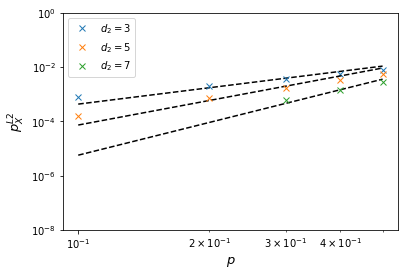

In [12]:
p_list = data2.columns
a = np.array(p_list)
a = [float(num) for num in a]
a = np.array(a)
fig, ax = plt.subplots()
for i in range(len(code_distance_list)):
    if i != 2:
        b = np.array(data2.loc[code_distance_list[i]])
        print(code_distance_list[i])
        print(a,b)
        mean = np.mean(np.log10(b)-(i+2)*np.log10(a))
        ax.plot(a, 10**mean*a**(i+2),marker='',color='k',linestyle="dashed")
        ax.plot(a, b,marker='x',label=r"$d_{2}=$"+str(code_distance_list[i]),linewidth=0)
        print("seppen=", mean)
    if i == 2:
        b = np.array(data2.loc[code_distance_list[i]])
        print(code_distance_list[i])
        mean = np.mean(np.log10(b[2:])-(i+2)*np.log10(a[2:]))
        ax.plot(a, 10**mean*a**(i+2),marker='',color='k',linestyle="dashed")
        ax.plot(a[2:], b[2:],marker='x',label=r"$d_{2}=$"+str(code_distance_list[i]),linewidth=0)
        print("seppen=", mean)
ax.set_xlabel(r"$p$", fontsize=13)
ax.set_ylabel(r'$p_X^{L2}$', fontsize=13)
ax.set_ylim(0,)
ax.xaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
ax.ticklabel_format(style="sci",  axis="x",scilimits=(0,0))
ax.yaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
ax.ticklabel_format(style="sci",  axis="y",scilimits=(0,0))
ax.set_xticks(a)
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_ylim(0.00000001, 1)
ax.legend()
plt.show()

0.4251195122269725
0.0279323864514814
0.6170884636713626
0.08543133796812184


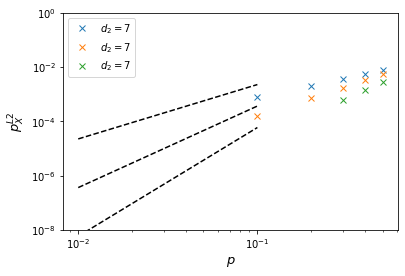

In [13]:
# 3-5
p_th = 10 ** ((-0.8109140355503797) - (-0.4394250743166765))
print(p_th)
logC = -0.4394250743166765 + 3 * ((-0.8109140355503797) - (-0.4394250743166765))
C = 10**(logC)
print(C)
# 5-7
p_th = 10 ** ((-0.4394250743166765) - (-0.2297725017702782))
print(p_th)
logC = -0.2297725017702782 + 4 * ((-0.4394250743166765) - (-0.2297725017702782))
C = 10**(logC)
print(C)

fig, ax = plt.subplots()
a_ = np.array([0.01,0.1])
ax.plot(a_, C*(a_/p_th)**2,marker='',color='k',linestyle="dashed")
ax.plot(a, data2.loc[3],marker='x',label=r"$d_{2}=$"+str(code_distance_list[i]),linewidth=0)
ax.plot(a_, C*(a_/p_th)**3,marker='',color='k',linestyle="dashed")
ax.plot(a, data2.loc[5],marker='x',label=r"$d_{2}=$"+str(code_distance_list[i]),linewidth=0)
ax.plot(a_, C*(a_/p_th)**4,marker='',color='k',linestyle="dashed")
ax.plot(a[2:], data2.loc[7][2:],marker='x',label=r"$d_{2}=$"+str(code_distance_list[i]),linewidth=0)
ax.set_xlabel(r"$p$", fontsize=13)
ax.set_ylabel(r'$p_X^{L2}$', fontsize=13)
ax.set_ylim(0,)
ax.xaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
ax.ticklabel_format(style="sci",  axis="x",scilimits=(0,0))
ax.yaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
ax.ticklabel_format(style="sci",  axis="y",scilimits=(0,0))
ax.set_xticks(a)
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_ylim(0.00000001, 1)
ax.legend()
plt.show()

### Zエラー

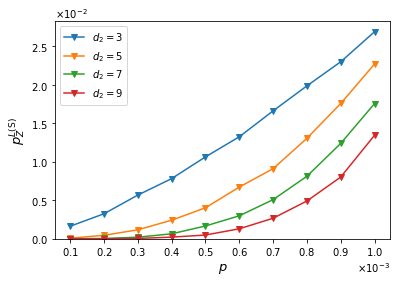

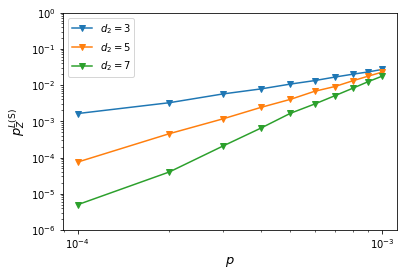

In [78]:
# FUjii-labのパス
path = "/Users/konohideki/Documents/Fujii-lab/surface_realistic/realistic_single_round/SWAP/d1=3,N=1,eta=1000"
# ファイル名
file2 = "Z error,N=1,d2=(3,7,2),eta=1000,trials=400000,ver0re" + ".csv"
########################################

# csvファイルの読み込み
os.chdir(path)
data2 = pd.read_csv(file2, index_col=0)
# データフレームの行名(リスト)を取得
code_distance_list = data2.index
# データフレームの列名(リスト)を取得
p_list = data2.columns
##### グラフ作成 #####

a = np.array(p_list)
a = [float(num) for num in a]
a = np.array(a)

fig, ax = plt.subplots()
for i in range(len(code_distance_list)):
    b = np.array(data2.loc[code_distance_list[i]])
    ax.plot(a, b,marker='v',label=r"$d_{2}=$"+str(code_distance_list[i]))
ax.set_xlabel(r"$p$", fontsize=13)
ax.set_ylabel(r'$p_Z^{L(\rm{S})}$', fontsize=13)
ax.set_ylim(0,)
ax.xaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
ax.ticklabel_format(style="sci",  axis="x",scilimits=(0,0))
ax.yaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
ax.ticklabel_format(style="sci",  axis="y",scilimits=(0,0))
ax.set_xticks(a)
ax.legend()


fig, ax = plt.subplots()
for i in range(len(code_distance_list)-1):
    b = np.array(data2.loc[code_distance_list[i]])
    ax.plot(a, b,marker='v',label=r"$d_{2}=$"+str(code_distance_list[i]))
ax.set_xlabel(r"$p$", fontsize=13)
ax.set_ylabel(r'$p_Z^{L(\rm{S})}$', fontsize=13)
ax.set_ylim(0,)
ax.xaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
ax.ticklabel_format(style="sci",  axis="x",scilimits=(0,0))
ax.yaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
ax.ticklabel_format(style="sci",  axis="y",scilimits=(0,0))
ax.set_xticks(a)
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_ylim(10e-7, 1)
ax.legend()

In [79]:
# この式の関数を定義
def pL_Z_3(p,code_distance):
    return C*(p/p_th)**((code_distance+1)/2)

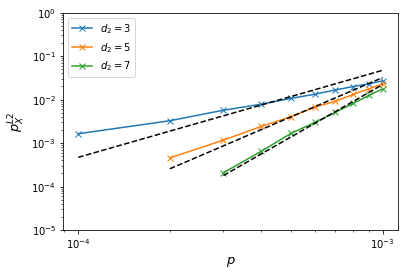

In [80]:
fig, ax = plt.subplots()
for i in range(len(code_distance_list)):
    if i == 0:
        b = np.array(data2.loc[code_distance_list[i]])
        mean = np.mean(np.log10(b)-(i+2)*np.log10(a))
        ax.plot(a, b,marker='x',label=r"$d_{2}=$"+str(code_distance_list[i]))
        ax.plot(a, 10**mean*a**(i+2),marker='',color='k',linestyle="dashed")
    if i == 1:
        b = np.array(data2.loc[code_distance_list[i]])[1:]
        a = np.array(p_list)
        a = [float(num) for num in a]
        a = np.array(a)[1:]
        mean = np.mean(np.log10(b)-(i+2)*np.log10(a))
        ax.plot(a, b,marker='x',label=r"$d_{2}=$"+str(code_distance_list[i]))
        ax.plot(a, 10**mean*a**(i+2),marker='',color='k',linestyle="dashed")
    if i == 2:
        b = np.array(data2.loc[code_distance_list[i]])[2:]
        a = np.array(p_list)
        a = [float(num) for num in a]
        a = np.array(a)[2:]
        mean = np.mean(np.log10(b)-(i+2)*np.log10(a))
        ax.plot(a, b,marker='x',label=r"$d_{2}=$"+str(code_distance_list[i]))
        ax.plot(a, 10**mean*a**(i+2),marker='',color='k',linestyle="dashed")
ax.set_xlabel(r"$p$", fontsize=13)
ax.set_ylabel(r'$p_X^{L2}$', fontsize=13)
ax.set_ylim(0,)
ax.xaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
ax.ticklabel_format(style="sci",  axis="x",scilimits=(0,0))
ax.yaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
ax.ticklabel_format(style="sci",  axis="y",scilimits=(0,0))
ax.set_xticks(a)
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_ylim(0.00001, 1)
ax.legend()
plt.show()

In [82]:
for i in range(len(code_distance_list)):
    if i == 0:
        b = np.array(data2.loc[code_distance_list[i]])
        a = np.array(p_list)
        a = [float(num) for num in a]
        a = np.array(a)
        X = np.log10(a).reshape(-1, 1)
        Y = np.log10(b)
        clf.fit(X, Y)
        print(10**clf.predict([[-4]]),"\n")
        print(code_distance_list[i]*(4*3+6)/10**clf.predict([[-4]]),"\n")
    if i == 1:
        b = np.array(data2.loc[code_distance_list[i]])[1:]
        a = np.array(p_list)
        a = [float(num) for num in a]
        a = np.array(a)[1:]
        X = np.log10(a).reshape(-1, 1)
        Y = np.log10(b)
        clf.fit(X, Y)
        print(10**clf.predict([[-4]]),"\n")
        print(code_distance_list[i]*(4*3+6)/10**clf.predict([[-4]]),"\n")
    if i == 2:
        b = np.array(data2.loc[code_distance_list[i]])[3:]
        a = np.array(p_list)
        a = [float(num) for num in a]
        a = np.array(a)[3:]
        X = np.log10(a).reshape(-1, 1)
        Y = np.log10(b)
        clf.fit(X, Y)
        print(10**clf.predict([[-4]]),"\n")
        print(code_distance_list[i]*(4*3+6)/10**clf.predict([[-4]]),"\n")

[0.00149154] 

[36204.24077348] 

[8.21474194e-05] 

[1095591.32470576] 

[5.07627038e-06] 

[24821372.86811477] 



# d1 = 5

In [32]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import os
import matplotlib.ticker as ptick

### Xエラー

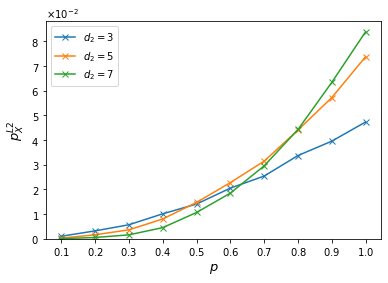

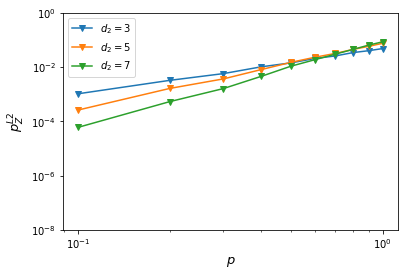

In [14]:
# FUjii-labのパス
path = "/Users/konohideki/Documents/Fujii-lab/surface_realistic/realistic_single_round/SWAP/d1=5,N=1,eta=1000"
# ファイル名
file2 = "X error,N=1,d2=(3,7,2),eta=1000,trials=100000,ver0" + ".csv"
########################################

# csvファイルの読み込み
os.chdir(path)
data2 = pd.read_csv(file2, index_col=0)
# データフレームの行名(リスト)を取得
code_distance_list = data2.index
# データフレームの列名(リスト)を取得
p_list = data2.columns
##### グラフ作成 #####

a = np.array(p_list)
a = [float(num) for num in a]
a = np.array(a)

fig, ax = plt.subplots()
for i in range(len(code_distance_list)):
    b = np.array(data2.loc[code_distance_list[i]])
    ax.plot(a, b,marker='x',label=r"$d_{2}=$"+str(code_distance_list[i]))
ax.set_xlabel(r"$p$", fontsize=13)
ax.set_ylabel(r'$p_X^{L2}$', fontsize=13)
ax.set_ylim(0,)
ax.xaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
ax.ticklabel_format(style="sci",  axis="x",scilimits=(0,0))
ax.yaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
ax.ticklabel_format(style="sci",  axis="y",scilimits=(0,0))
ax.set_xticks(a)
ax.legend()

fig, ax = plt.subplots()
for i in range(len(code_distance_list)):
    b = np.array(data2.loc[code_distance_list[i]])
    ax.plot(a, b,marker='v',label=r"$d_{2}=$"+str(code_distance_list[i]))
ax.set_xlabel(r"$p$", fontsize=13)
ax.set_ylabel(r'$p_Z^{L2}$', fontsize=13)
ax.set_ylim(0,)
ax.set_xticks(a)
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_ylim(0.00000001, 1)
ax.legend()

### 普通の線形回帰

katamuki= [1.67548229]
seppen= -1.329141093298095
[-8.03107025]
hokan= [9.30957281e-09] 

katamuki= [2.44781446]
seppen= -1.119773983674937
[-10.91103181]
hokan= [1.22734933e-11] 

katamuki= [3.27914707]
seppen= -1.036708330236059
[-14.15329661]
hokan= [7.02592305e-15] 

[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ] [  0.19552684   0.41602658   0.88518856   1.8834344    4.00742317
   8.52667897  18.14239503  38.60195729  82.13420029 174.75867365]


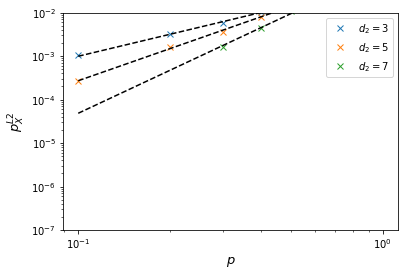

In [15]:
from sklearn import linear_model
clf = linear_model.LinearRegression()

p_list = []

fig, ax = plt.subplots()
for i in range(len(code_distance_list)):
    if i != 2:
        b = np.array(data2.loc[code_distance_list[i]])
        X = np.log10(a).reshape(-1, 1)
        Y = np.log10(b)
        clf.fit(X, Y)
        print("katamuki=", clf.coef_)
        print("seppen=", clf.intercept_)
        print(clf.predict([[-4]]))
        print("hokan=", 10**clf.predict([[-4]]),"\n")
        p_list.append(10**clf.predict([[-4]]))
        ax.plot(a, b,marker='x',label=r"$d_{2}=$"+str(code_distance_list[i]),linewidth=0)
        ax.plot(a, 10**clf.predict(np.log10(a).reshape(-1, 1)),marker='',color="k",linestyle="dashed")
    if i == 2:
        b = np.array(data2.loc[code_distance_list[i]])
        X = np.log10(a[2:]).reshape(-1, 1)
        Y = np.log10(b[2:])
        clf.fit(X, Y)
        print("katamuki=", clf.coef_)
        print("seppen=", clf.intercept_)
        print(clf.predict([[-4]]))
        print("hokan=", 10**clf.predict([[-4]]),"\n")
        p_list.append(10**clf.predict([[-4]]))
        ax.plot(a[2:], b[2:],marker='x',label=r"$d_{2}=$"+str(code_distance_list[i]),linewidth=0)
        ax.plot(a, 10**clf.predict(np.log10(a).reshape(-1, 1)),marker='',color="k",linestyle="dashed")
print(a,10**clf.predict(a.reshape(-1, 1)))
ax.set_xlabel(r"$p$", fontsize=13)
ax.set_ylabel(r'$p_X^{L2}$', fontsize=13)
ax.set_ylim(0,)
ax.xaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
ax.ticklabel_format(style="sci",  axis="x",scilimits=(0,0))
ax.yaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
ax.ticklabel_format(style="sci",  axis="y",scilimits=(0,0))
ax.set_xticks(a)
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_ylim(0.0000001, 0.01)
ax.legend()

[[0.11511003]] [[0.01417555]]


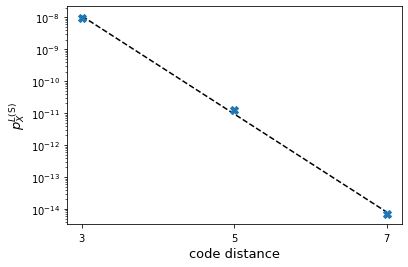

In [18]:
p_list = np.array(p_list)

# fitting
from sklearn import linear_model
clf = linear_model.LinearRegression()
X = np.array(code_distance_list).reshape(-1, 1)
Y = np.log10(p_list)
clf.fit(X, Y)
predict_p = clf.predict([[3],[7]]) 
# モデルの決定
a = clf.coef_
p_th = 10**(-4) / 10**(2*a)
b = clf.intercept_
C = 10**(b-a)
print(p_th, C)
# この式の関数を定義
def pL_X_5(p,code_distance,p_th=p_th,C=C):
    return C*(p/p_th)**((code_distance+1)/2)

##### グラフ作成 #####
fig, ax = plt.subplots()
ax.plot([3,7],10**predict_p,marker='',linestyle="dashed",color="k")
ax.plot(code_distance_list,p_list,marker='X',linewidth=0,markersize=8)
ax.set_xlabel(r"code distance", fontsize=13)
ax.set_ylabel(r'$p_X^{L(\rm{S})}$', fontsize=13)
ax.xaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
ax.ticklabel_format(style="sci",  axis="x",scilimits=(0,0))
ax.yaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
ax.ticklabel_format(style="sci",  axis="y",scilimits=(0,0))
ax.set_xticks(code_distance_list)
ax.set_yscale("log")

### 傾き指定

/var/folders/z2/d7v_26mx7_s1sc2tvt5zxxmc0000gn/T/ipykernel_22156/1369513264.py:5: RuntimeWarning: invalid value encountered in log10
  mean = np.mean(np.log10(b)-(i+2)*np.log10(a))


ValueError: x and y must have same first dimension, but have shapes (1, 1) and (10,)

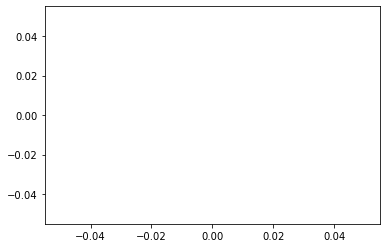

In [36]:
fig, ax = plt.subplots()
for i in range(len(code_distance_list)):
    if i != 2:
        b = np.array(data2.loc[code_distance_list[i]])
        mean = np.mean(np.log10(b)-(i+2)*np.log10(a))
        ax.plot(a, 10**mean*a**(i+2),marker='',color='k',linestyle="dashed")
        ax.plot(a, b,marker='x',label=r"$d_{2}=$"+str(code_distance_list[i]),linewidth=0)
        print("seppen=", mean)
    if i == 2:
        b = np.array(data2.loc[code_distance_list[i]])
        mean = np.mean(np.log10(b[2:])-(i+2)*np.log10(a[2:]))
        ax.plot(a, 10**mean*a**(i+2),marker='',color='k',linestyle="dashed")
        ax.plot(a[2:], b[2:],marker='x',label=r"$d_{2}=$"+str(code_distance_list[i]),linewidth=0)
        print("seppen=", mean)
ax.set_xlabel(r"$p$", fontsize=13)
ax.set_ylabel(r'$p_X^{L2}$', fontsize=13)
ax.set_ylim(0,)
ax.xaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
ax.ticklabel_format(style="sci",  axis="x",scilimits=(0,0))
ax.yaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
ax.ticklabel_format(style="sci",  axis="y",scilimits=(0,0))
ax.set_xticks(a)
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_ylim(0.00000001, 1)
ax.legend()
plt.show()

0.30685505936839
0.018480027716601195
0.681097325252199
0.2020832313855329


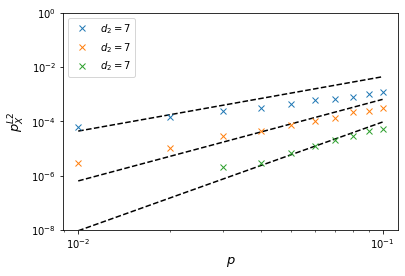

In [ ]:
# 3-5
p_th = 10 ** ((-0.7071639582436609) - (-0.1940972464882152))
print(p_th)
logC = -0.1940972464882152 + 3 * ((-0.7071639582436609) - (-0.1940972464882152))
C = 10**(logC)
print(C)
# 5-7
p_th = 10 ** ((-0.1940972464882152) - (-0.027306421249620905))
print(p_th)
logC = -0.027306421249620905 + 4 * ((-0.1940972464882152) - (-0.027306421249620905))
C = 10**(logC)
print(C)

fig, ax = plt.subplots()
a_ = np.array([0.01,0.1])
ax.plot(a_, C*(a_/p_th)**2,marker='',color='k',linestyle="dashed")
ax.plot(a, data2.loc[3],marker='x',label=r"$d_{2}=$"+str(code_distance_list[i]),linewidth=0)
ax.plot(a_, C*(a_/p_th)**3,marker='',color='k',linestyle="dashed")
ax.plot(a, data2.loc[5],marker='x',label=r"$d_{2}=$"+str(code_distance_list[i]),linewidth=0)
ax.plot(a_, C*(a_/p_th)**4,marker='',color='k',linestyle="dashed")
ax.plot(a[2:], data2.loc[7][2:],marker='x',label=r"$d_{2}=$"+str(code_distance_list[i]),linewidth=0)
ax.set_xlabel(r"$p$", fontsize=13)
ax.set_ylabel(r'$p_X^{L2}$', fontsize=13)
ax.set_ylim(0,)
ax.xaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
ax.ticklabel_format(style="sci",  axis="x",scilimits=(0,0))
ax.yaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
ax.ticklabel_format(style="sci",  axis="y",scilimits=(0,0))
ax.set_xticks(a)
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_ylim(0.00000001, 1)
ax.legend()
plt.show()

### Zエラー

51832.460732987005
916666.6666666666
13199999.999999998


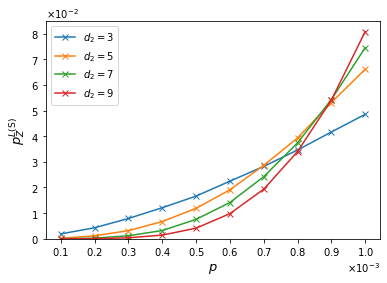

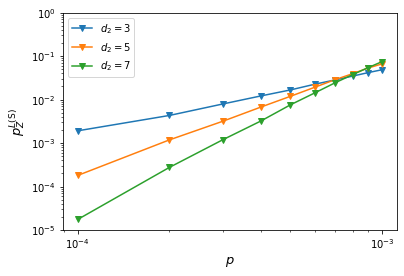

In [73]:
# FUjii-labのパス
path = "/Users/konohideki/Documents/Fujii-lab/surface_realistic/realistic_single_round/SWAP/d1=5,N=1,eta=1000"
# ファイル名
file2 = "Z error,N=1,d2=(3,7,2),eta=1000,trials=400000,ver0" + ".csv"
########################################

# csvファイルの読み込み
os.chdir(path)
data2 = pd.read_csv(file2, index_col=0)

# データフレームの行名(リスト)を取得
code_distance_list = data2.index

# データフレームの列名(リスト)を取得
p_list = data2.columns

##### グラフ作成 #####

a = np.array(p_list)
a = [float(num) for num in a]
a = np.array(a)

fig, ax = plt.subplots()
for i in range(len(code_distance_list)):
    b = np.array(data2.loc[code_distance_list[i]])
    ax.plot(a, b,marker='x',label=r"$d_{2}=$"+str(code_distance_list[i]))
ax.set_xlabel(r"$p$", fontsize=13)
ax.set_ylabel(r'$p_Z^{L(\rm{S})}$', fontsize=13)
ax.set_ylim(0,)
ax.xaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
ax.ticklabel_format(style="sci",  axis="x",scilimits=(0,0))
ax.yaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
ax.ticklabel_format(style="sci",  axis="y",scilimits=(0,0))
ax.set_xticks(a)
ax.legend()


fig, ax = plt.subplots()
for i in range(len(code_distance_list)-1):
    b = np.array(data2.loc[code_distance_list[i]])
    ax.plot(a, b,marker='v',label=r"$d_{2}=$"+str(code_distance_list[i]))
    print(code_distance_list[i]*(4*5+6+7)/b[0])
ax.set_xlabel(r"$p$", fontsize=13)
ax.set_ylabel(r'$p_Z^{L(\rm{S})}$', fontsize=13)
ax.set_ylim(0,)
ax.xaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
ax.ticklabel_format(style="sci",  axis="x",scilimits=(0,0))
ax.yaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
ax.ticklabel_format(style="sci",  axis="y",scilimits=(0,0))
ax.set_xticks(a)
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_ylim(0.00001, 1)
ax.legend()

/var/folders/z2/d7v_26mx7_s1sc2tvt5zxxmc0000gn/T/ipykernel_22156/3169828978.py:4: RuntimeWarning: divide by zero encountered in log10
  mean = np.mean(np.log10(b)-(i+2)*np.log10(a))


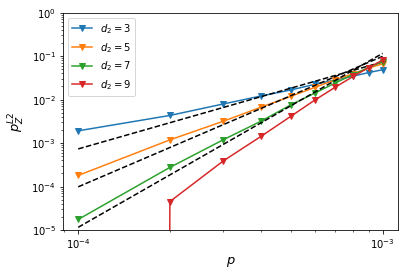

In [74]:
fig, ax = plt.subplots()
for i in range(len(code_distance_list)):
    b = np.array(data2.loc[code_distance_list[i]])
    mean = np.mean(np.log10(b)-(i+2)*np.log10(a))
    ax.plot(a, b,marker='v',label=r"$d_{2}=$"+str(code_distance_list[i]))
    ax.plot(a, 10**mean*a**(i+2),marker='',color='k',linestyle="dashed")
ax.set_xlabel(r"$p$", fontsize=13)
ax.set_ylabel(r'$p_Z^{L2}$', fontsize=13)
ax.set_ylim(0,)
ax.xaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
ax.ticklabel_format(style="sci",  axis="x",scilimits=(0,0))
ax.yaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
ax.ticklabel_format(style="sci",  axis="y",scilimits=(0,0))
ax.set_xticks(a)
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_ylim(0.00001, 1)
ax.legend()
plt.show()

# d1 = 7

In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import os
import matplotlib.ticker as ptick

### Xエラー

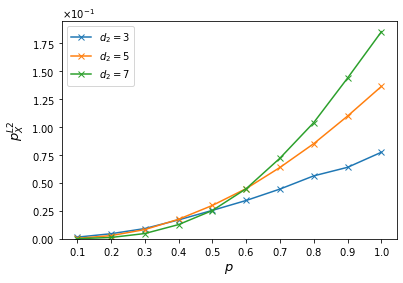

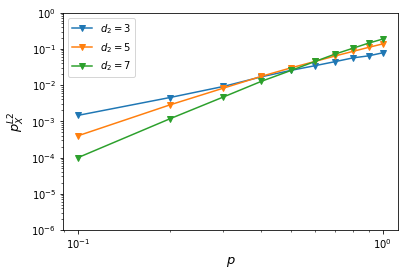

In [19]:
# FUjii-labのパス
path = "/Users/konohideki/Documents/Fujii-lab/surface_realistic/realistic_single_round/SWAP/d1=7,N=1,eta=1000"
# ファイル名
file2 = "X error,N=1,d2=(3,7,2),eta=1000,trials=100000,ver0" + ".csv"
########################################

# csvファイルの読み込み
os.chdir(path)
data2 = pd.read_csv(file2, index_col=0)

# データフレームの行名(リスト)を取得
code_distance_list = data2.index

# データフレームの列名(リスト)を取得
p_list = data2.columns

##### グラフ作成 #####

a = np.array(p_list)
a = [float(num) for num in a]
a = np.array(a)

fig, ax = plt.subplots()
for i in range(len(code_distance_list)):
    b = np.array(data2.loc[code_distance_list[i]])
    ax.plot(a, b,marker='x',label=r"$d_{2}=$"+str(code_distance_list[i]))
ax.set_xlabel(r"$p$", fontsize=13)
ax.set_ylabel(r'$p_X^{L2}$', fontsize=13)
ax.set_ylim(0,)
ax.xaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
ax.ticklabel_format(style="sci",  axis="x",scilimits=(0,0))
ax.yaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
ax.ticklabel_format(style="sci",  axis="y",scilimits=(0,0))
ax.set_xticks(a)
ax.legend()

fig, ax = plt.subplots()
for i in range(len(code_distance_list)):
    b = np.array(data2.loc[code_distance_list[i]])
    ax.plot(a, b,marker='v',label=r"$d_{2}=$"+str(code_distance_list[i]))
ax.set_xlabel(r"$p$", fontsize=13)
ax.set_ylabel(r'$p_X^{L2}$', fontsize=13)
ax.set_ylim(0,)
ax.xaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
ax.ticklabel_format(style="sci",  axis="x",scilimits=(0,0))
ax.yaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
ax.ticklabel_format(style="sci",  axis="y",scilimits=(0,0))
ax.set_xticks(a)
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_ylim(0.000001, 1)
ax.legend()

### 普通の線形回帰

katamuki= [1.75623298]
seppen= -1.091852981992119
[-8.11678492]
hokan= [7.64214168e-09] 

katamuki= [2.51747914]
seppen= -0.8094158961595673
[-10.87933246]
hokan= [1.32028456e-11] 

katamuki= [3.05545713]
seppen= -0.6940577903166135
[-12.91588632]
hokan= [1.2137065e-13] 

[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ] [  0.40877838   0.82610193   1.66947281   3.37384451   6.81821633
  13.7789616   27.84596052  56.27401686 113.72439358 229.82609767]


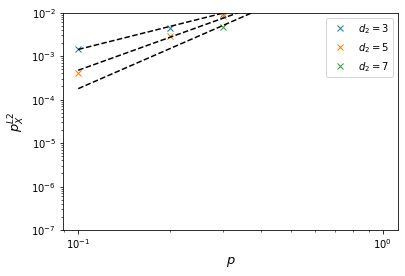

In [20]:
from sklearn import linear_model
clf = linear_model.LinearRegression()

p_list = []

fig, ax = plt.subplots()
for i in range(len(code_distance_list)):
    if i != 2:
        b = np.array(data2.loc[code_distance_list[i]])
        X = np.log10(a).reshape(-1, 1)
        Y = np.log10(b)
        clf.fit(X, Y)
        print("katamuki=", clf.coef_)
        print("seppen=", clf.intercept_)
        print(clf.predict([[-4]]))
        print("hokan=", 10**clf.predict([[-4]]),"\n")
        p_list.append(10**clf.predict([[-4]]))
        ax.plot(a, b,marker='x',label=r"$d_{2}=$"+str(code_distance_list[i]),linewidth=0)
        ax.plot(a, 10**clf.predict(np.log10(a).reshape(-1, 1)),marker='',color="k",linestyle="dashed")
    if i == 2:
        b = np.array(data2.loc[code_distance_list[i]])
        X = np.log10(a[2:]).reshape(-1, 1)
        Y = np.log10(b[2:])
        clf.fit(X, Y)
        print("katamuki=", clf.coef_)
        print("seppen=", clf.intercept_)
        print(clf.predict([[-4]]))
        print("hokan=", 10**clf.predict([[-4]]),"\n")
        p_list.append(10**clf.predict([[-4]]))
        ax.plot(a[2:], b[2:],marker='x',label=r"$d_{2}=$"+str(code_distance_list[i]),linewidth=0)
        ax.plot(a, 10**clf.predict(np.log10(a).reshape(-1, 1)),marker='',color="k",linestyle="dashed")
print(a,10**clf.predict(a.reshape(-1, 1)))
ax.set_xlabel(r"$p$", fontsize=13)
ax.set_ylabel(r'$p_X^{L2}$', fontsize=13)
ax.set_ylim(0,)
ax.xaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
ax.ticklabel_format(style="sci",  axis="x",scilimits=(0,0))
ax.yaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
ax.ticklabel_format(style="sci",  axis="y",scilimits=(0,0))
ax.set_xticks(a)
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_ylim(0.0000001, 0.01)
ax.legend()

katamuki= [1.75623298]
seppen= -1.091852981992119
[-8.11678492]
hokan= [7.64214168e-09] 

katamuki= [2.51747914]
seppen= -0.8094158961595673
[-10.87933246]
hokan= [1.32028456e-11] 

katamuki= [3.05545713]
seppen= -0.6940577903166135
[-12.91588632]
hokan= [1.2137065e-13] 

[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ] [  0.40877838   0.82610193   1.66947281   3.37384451   6.81821633
  13.7789616   27.84596052  56.27401686 113.72439358 229.82609767]


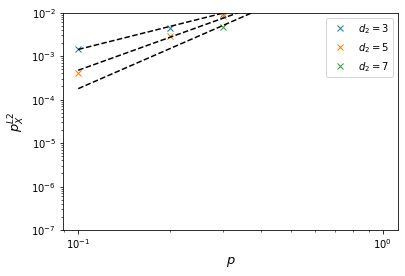

In [21]:
from sklearn import linear_model
clf = linear_model.LinearRegression()

p_list = []

fig, ax = plt.subplots()
for i in range(len(code_distance_list)):
    if i != 2:
        b = np.array(data2.loc[code_distance_list[i]])
        X = np.log10(a).reshape(-1, 1)
        Y = np.log10(b)
        clf.fit(X, Y)
        print("katamuki=", clf.coef_)
        print("seppen=", clf.intercept_)
        print(clf.predict([[-4]]))
        print("hokan=", 10**clf.predict([[-4]]),"\n")
        p_list.append(10**clf.predict([[-4]]))
        ax.plot(a, b,marker='x',label=r"$d_{2}=$"+str(code_distance_list[i]),linewidth=0)
        ax.plot(a, 10**clf.predict(np.log10(a).reshape(-1, 1)),marker='',color="k",linestyle="dashed")
    if i == 2:
        b = np.array(data2.loc[code_distance_list[i]])
        X = np.log10(a[2:]).reshape(-1, 1)
        Y = np.log10(b[2:])
        clf.fit(X, Y)
        print("katamuki=", clf.coef_)
        print("seppen=", clf.intercept_)
        print(clf.predict([[-4]]))
        print("hokan=", 10**clf.predict([[-4]]),"\n")
        p_list.append(10**clf.predict([[-4]]))
        ax.plot(a[2:], b[2:],marker='x',label=r"$d_{2}=$"+str(code_distance_list[i]),linewidth=0)
        ax.plot(a, 10**clf.predict(np.log10(a).reshape(-1, 1)),marker='',color="k",linestyle="dashed")
print(a,10**clf.predict(a.reshape(-1, 1)))
ax.set_xlabel(r"$p$", fontsize=13)
ax.set_ylabel(r'$p_X^{L2}$', fontsize=13)
ax.set_ylim(0,)
ax.xaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
ax.ticklabel_format(style="sci",  axis="x",scilimits=(0,0))
ax.yaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
ax.ticklabel_format(style="sci",  axis="y",scilimits=(0,0))
ax.set_xticks(a)
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_ylim(0.0000001, 0.01)
ax.legend()

p_th= 0.02509289124100398 
C= 0.0003641812208747148


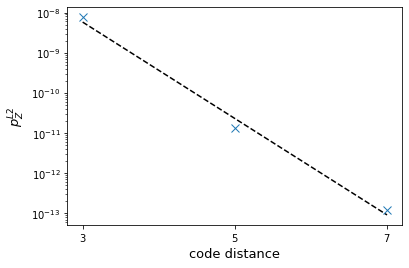

In [22]:
p_list = np.array(p_list)

# fitting
from sklearn import linear_model
clf = linear_model.LinearRegression()
X = np.array(code_distance_list).reshape(-1, 1)
Y = np.log10(p_list)
clf.fit(X, Y)
predict_p = clf.predict([[3],[7]]) 
# モデルの決定
a = clf.coef_
p_th = 10**(-4) / 10**(2*a)
b = clf.intercept_
C = 10**(b-a)
print("p_th=",p_th[0,0], "\nC=",C[0,0])
# この式の関数を定義
def pL_X_7(p,code_distance,p_th=p_th,C=C):
    return C*(p/p_th)**((code_distance+1)/2)

##### グラフ作成 #####
fig, ax = plt.subplots()
ax.plot([3,7],10**predict_p,marker='',linestyle="dashed",color="k")
ax.plot(code_distance_list,p_list,marker='x',linewidth=0,markersize=8)
ax.set_xlabel(r"code distance", fontsize=13)
ax.set_ylabel(r'$p_Z^{L2}$', fontsize=13)
ax.xaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
ax.ticklabel_format(style="sci",  axis="x",scilimits=(0,0))
ax.yaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
ax.ticklabel_format(style="sci",  axis="y",scilimits=(0,0))
ax.set_xticks(code_distance_list)
ax.set_yscale("log")

### 傾き指定

/var/folders/z2/d7v_26mx7_s1sc2tvt5zxxmc0000gn/T/ipykernel_22156/1447109617.py:5: RuntimeWarning: invalid value encountered in log10
  mean = np.mean(np.log10(b)-(i+2)*np.log10(a))


ValueError: x and y must have same first dimension, but have shapes (1, 1) and (10,)

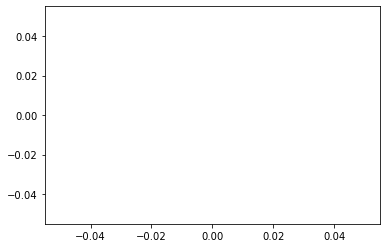

In [40]:
fig, ax = plt.subplots()
for i in range(len(code_distance_list)):
    if i != 2:
        b = np.array(data2.loc[code_distance_list[i]])
        mean = np.mean(np.log10(b)-(i+2)*np.log10(a))
        ax.plot(a, 10**mean*a**(i+2),marker='',color='k',linestyle="dashed")
        ax.plot(a, b,marker='x',label=r"$d_{2}=$"+str(code_distance_list[i]),linewidth=0)
        print("seppen=", mean)
    if i == 2:
        b = np.array(data2.loc[code_distance_list[i]])
        mean = np.mean(np.log10(b[1:])-(i+2)*np.log10(a[1:]))
        ax.plot(a, 10**mean*a**(i+2),marker='',color='k',linestyle="dashed")
        ax.plot(a, b,marker='x',label=r"$d_{2}=$"+str(code_distance_list[i]),linewidth=0)
        print("seppen=", mean)
ax.set_xlabel(r"$p$", fontsize=13)
ax.set_ylabel(r'$p_X^{L2}$', fontsize=13)
ax.set_ylim(0,)
ax.xaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
ax.ticklabel_format(style="sci",  axis="x",scilimits=(0,0))
ax.yaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
ax.ticklabel_format(style="sci",  axis="y",scilimits=(0,0))
ax.set_xticks(a)
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_ylim(0.0000001, 1)
ax.legend()
plt.show()

0.2360300960404019
0.013292412495758747
0.5222095144106843
0.14395806527580193


ValueError: x and y must have same first dimension, but have shapes (1, 1) and (10,)

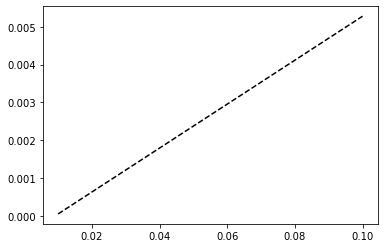

In [41]:
# 3-5
p_th = 10 ** ((-0.6223309561767485) - (0.004701660722085377))
print(p_th)
logC = 0.004701660722085377 + 3 * ((-0.6223309561767485) - (0.004701660722085377))
C = 10**(logC)
print(C)
# 5-7
p_th = 10 ** ((0.004701660722085377) - (0.28685688052275743))
print(p_th)
logC = 0.28685688052275743 + 4 * ((0.004701660722085377) - (0.28685688052275743))
C = 10**(logC)
print(C)

fig, ax = plt.subplots()
a_ = np.array([0.01,0.1])
ax.plot(a_, C*(a_/p_th)**2,marker='',color='k',linestyle="dashed")
ax.plot(a, data2.loc[3],marker='x',label=r"$d_{2}=$"+str(code_distance_list[i]),linewidth=0)
ax.plot(a_, C*(a_/p_th)**3,marker='',color='k',linestyle="dashed")
ax.plot(a, data2.loc[5],marker='x',label=r"$d_{2}=$"+str(code_distance_list[i]),linewidth=0)
ax.plot(a_, C*(a_/p_th)**4,marker='',color='k',linestyle="dashed")
ax.plot(a[2:], data2.loc[7][2:],marker='x',label=r"$d_{2}=$"+str(code_distance_list[i]),linewidth=0)
ax.set_xlabel(r"$p$", fontsize=13)
ax.set_ylabel(r'$p_X^{L2}$', fontsize=13)
ax.set_ylim(0,)
ax.xaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
ax.ticklabel_format(style="sci",  axis="x",scilimits=(0,0))
ax.yaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
ax.ticklabel_format(style="sci",  axis="y",scilimits=(0,0))
ax.set_xticks(a)
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_ylim(0.00000001, 1)
ax.legend()
plt.show()

### Zエラー

44155.84415584607
422360.24844720494
3661538.4615384596


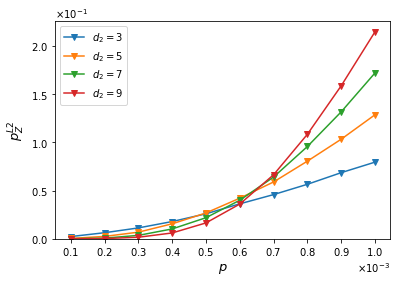

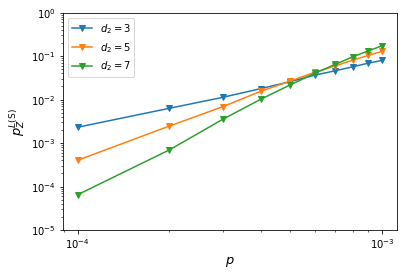

In [42]:
# FUjii-labのパス
path = "/Users/konohideki/Documents/Fujii-lab/surface_realistic/realistic_single_round/SWAP/d1=7,N=1,eta=1000"
# ファイル名
file2 = "Z error,N=1,d2=(3,7,2),eta=1000,trials=400000,ver0" + ".csv"
########################################

# csvファイルの読み込み
os.chdir(path)
data2 = pd.read_csv(file2, index_col=0)

# データフレームの行名(リスト)を取得
code_distance_list = data2.index

# データフレームの列名(リスト)を取得
p_list = data2.columns

##### グラフ作成 #####

a = np.array(p_list)
a = [float(num) for num in a]
a = np.array(a)

fig, ax = plt.subplots()
for i in range(len(code_distance_list)):
    b = np.array(data2.loc[code_distance_list[i]])
    ax.plot(a, b,marker='v',label=r"$d_{2}=$"+str(code_distance_list[i]))
ax.set_xlabel(r"$p$", fontsize=13)
ax.set_ylabel(r'$p_Z^{L2}$', fontsize=13)
ax.set_ylim(0,)
ax.xaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
ax.ticklabel_format(style="sci",  axis="x",scilimits=(0,0))
ax.yaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
ax.ticklabel_format(style="sci",  axis="y",scilimits=(0,0))
ax.set_xticks(a)
ax.legend()


fig, ax = plt.subplots()
for i in range(len(code_distance_list)-1):
    b = np.array(data2.loc[code_distance_list[i]])
    ax.plot(a, b,marker='v',label=r"$d_{2}=$"+str(code_distance_list[i]))
    print(code_distance_list[i]*(4*7+6)/b[0])
ax.set_xlabel(r"$p$", fontsize=13)
ax.set_ylabel(r'$p_Z^{L(\rm{S})}$', fontsize=13)
ax.set_ylim(0,)
ax.xaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
ax.ticklabel_format(style="sci",  axis="x",scilimits=(0,0))
ax.yaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
ax.ticklabel_format(style="sci",  axis="y",scilimits=(0,0))
ax.set_xticks(a)
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_ylim(0.00001, 1)
ax.legend()

### fitting

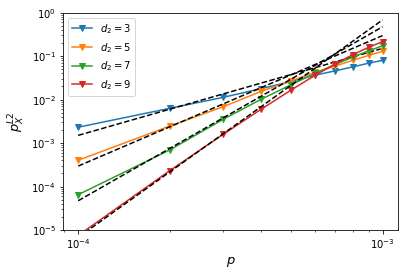

In [11]:
fig, ax = plt.subplots()
for i in range(len(code_distance_list)):
    b = np.array(data2.loc[code_distance_list[i]])
    mean = np.mean(np.log10(b)[:4]-(i+2)*np.log10(a)[:4])
    ax.plot(a, b,marker='v',label=r"$d_{2}=$"+str(code_distance_list[i]))
    ax.plot(a, 10**mean*a**(i+2),marker='',color='k',linestyle="dashed")
ax.set_xlabel(r"$p$", fontsize=13)
ax.set_ylabel(r'$p_X^{L2}$', fontsize=13)
ax.set_ylim(0,)
ax.xaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
ax.ticklabel_format(style="sci",  axis="x",scilimits=(0,0))
ax.yaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
ax.ticklabel_format(style="sci",  axis="y",scilimits=(0,0))
ax.set_xticks(a)
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_ylim(0.00001, 1)
ax.legend()
plt.show()

# p=10^{-4}で符号距離の関数としてプロット

[0.00180831] [0.50234795]


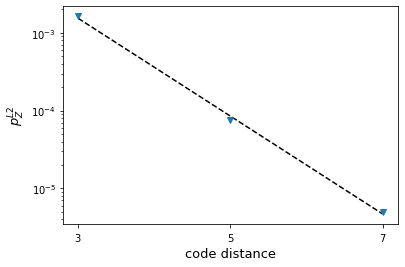

In [20]:
# FUjii-labのパス
path = "/Users/konohideki/Documents/Fujii-lab/surface_realistic/realistic_single_round/SWAP/d1=3,N=1,eta=1000"
# ファイル名
file2 = "Z error,N=1,d2=(3,7,2),eta=1000,trials=400000,ver0re" + ".csv"
########################################

# csvファイルの読み込み
os.chdir(path)
data2 = pd.read_csv(file2, index_col=0)

# データフレームの行名(リスト)を取得
code_distance_list = data2.index[0:3]
p_list = data2.iloc[:,0][0:3]

# fitting
from sklearn import linear_model
clf = linear_model.LinearRegression()
X = np.array(code_distance_list).reshape(-1, 1)
Y = np.log10(p_list)
clf.fit(X, Y)
predict_p = clf.predict([[3],[7]]) 
# モデルの決定
a = clf.coef_
p_th = 10**(-4) / 10**(2*a)
b = clf.intercept_
C = 10**(b-a)
print(p_th, C)
# この式の関数を定義
def pL_Z_3(p,code_distance,p_th=p_th,C=C):
    return C*(p/p_th)**((code_distance+1)/2)

##### グラフ作成 #####
fig, ax = plt.subplots()
ax.plot([3,7],10**predict_p,marker='',linestyle="dashed",color="k",markersize=8)
ax.plot(code_distance_list,p_list,marker='v',linewidth=0)
ax.set_xlabel(r"code distance", fontsize=13)
ax.set_ylabel(r'$p_Z^{L2}$', fontsize=13)
ax.xaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
ax.ticklabel_format(style="sci",  axis="x",scilimits=(0,0))
ax.yaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
ax.ticklabel_format(style="sci",  axis="y",scilimits=(0,0))
ax.set_xticks(code_distance_list)
ax.set_yscale("log")

[2.45075191e-07 1.85217127e-09 1.39979016e-11 1.05790027e-13
 7.99514829e-16 6.04238392e-18]
[1.90011097e-03 1.81878476e-04 1.74093937e-05 1.66642583e-06
 1.59510152e-07 1.52682995e-08]


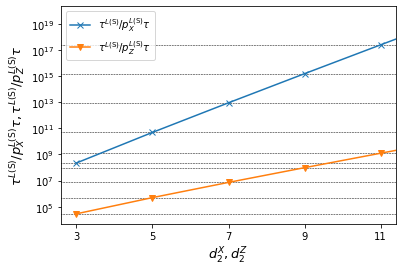

In [88]:
fig, ax = plt.subplots()
code_distance_list = np.array([3,5,7,9,11,13])
cm = plt.get_cmap("tab10")
print(pL_X_3(0.0001,code_distance_list)[0])
print(pL_Z_3(0.0001,code_distance_list))
ax.plot(code_distance_list, (4*3+6)*code_distance_list /pL_X_3(0.0001,code_distance_list)[0],marker='x',label=r"$\tau^{L(\rm{S})}/p_{X}^{L(\rm{S})}\tau$")
ax.plot(code_distance_list, (4*3+6)*code_distance_list /pL_Z_3(0.0001,code_distance_list),marker='v',label=r"$\tau^{L(\rm{S})}/p_{Z}^{L(\rm{S})}\tau$")
for i in range(len(code_distance_list)-1):
    plt.hlines([(4*3+6)*code_distance_list[i] /pL_X_3(0.0001,code_distance_list[i])[0]], 0, 12, "k", linestyles='dashed',linewidth=0.5)
    plt.hlines([(4*3+6)*code_distance_list[i] /pL_Z_3(0.0001,code_distance_list[i])[0]], 0, 12, "k", linestyles='dashed',linewidth=0.5)
ax.set_xlabel(r"$d_2^X, d_2^Z$", fontsize=13)
ax.set_ylabel(r'$\tau^{L(\rm{S})}/p_{X}^{L(\rm{S})}\tau, \tau^{L(\rm{S})}/p_{Z}^{L(\rm{S})}\tau$', fontsize=13)
ax.set_xticks(code_distance_list)
ax.set_yscale("log")
ax.set_xlim(2.6, 11.4)
ax.legend()
plt.show()

[ 65. 117. 169. 221. 393. 485. 577.]
[2.84193927e+04 4.94835903e+05 7.23747201e+06 9.72140477e+07
 9.72140477e+07 1.24130030e+09 1.53258718e+10]


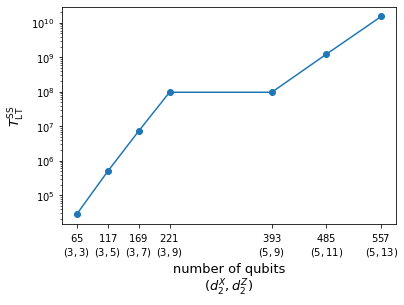

In [85]:
cd_list =[[3,3],[3,5],[3,7],[3,9],[5,9],[5,11],[5,13]]
lifetime_list = np.array([])
number_list = np.array([])
def qubits_number(d1,dx,dz):
    return dx + dz - 1 + (2*d1 -1)*(2*dx*dz-dx-dz)
for cd in cd_list:
    a = (4*3+6)*cd[0] /pL_X_3(0.0001,cd[0])[0]
    b = (4*3+6)*cd[1] /pL_Z_3(0.0001,cd[1])[0]
    lifetime_list = np.append(lifetime_list,min(a,b))
    number_list = np.append(number_list,qubits_number(3,cd[0],cd[1]))
print(number_list)
print(lifetime_list)
fig, ax = plt.subplots()
ax.plot(number_list, lifetime_list,marker='o')
ax.set_xlabel(r"number of qubits"+"\n"+r"$(d^{X}_{2},d^{Z}_{2})$", fontsize=13)
ax.set_ylabel(r'$T_{\mathrm{LT}}^{\mathrm{SS}}$', fontsize=13)
ax.set_xticks(number_list)
ax.set_xticklabels([r"$65$"+"\n"+r"$(3,3)$",r"$117$"+"\n"+r"$(3,5)$",r"$169$"+"\n"+r"$(3,7)$",r"$221$"+"\n"+r"$(3,9)$",
                    r"$393$"+"\n"+r"$(5,9)$",r"$485$"+"\n"+r"$(5,11)$",r"$557$"+"\n"+r"$(5,13)$"])
ax.set_yscale("log")
#ax.set_xlim(2.6, 11.4)
#ax.legend()
plt.show()

[0.00104471] [0.20738354]


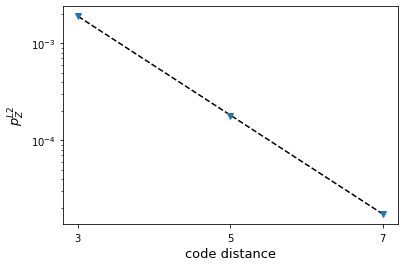

In [75]:
# FUjii-labのパス
path = "/Users/konohideki/Documents/Fujii-lab/surface_realistic/realistic_single_round/SWAP/d1=5,N=1,eta=1000"
# ファイル名
file2 = "Z error,N=1,d2=(3,7,2),eta=1000,trials=400000,ver0re" + ".csv"
########################################

# csvファイルの読み込み
os.chdir(path)
data2 = pd.read_csv(file2, index_col=0)

# データフレームの行名(リスト)を取得
code_distance_list = data2.index[0:3]
p_list = data2.iloc[:,0][0:3]

# fitting
from sklearn import linear_model
clf = linear_model.LinearRegression()
X = np.array(code_distance_list).reshape(-1, 1)
Y = np.log10(p_list)
clf.fit(X, Y)
predict_p = clf.predict([[3],[7]]) 
# モデルの決定
a = clf.coef_
p_th = 10**(-4) / 10**(2*a)
b = clf.intercept_
C = 10**(b-a)
print(p_th, C)
# この式の関数を定義
def pL_Z_5(p,code_distance,p_th=p_th,C=C):
    return C*(p/p_th)**((code_distance+1)/2)

##### グラフ作成 #####
fig, ax = plt.subplots()
ax.plot([3,7],10**predict_p,marker='',linestyle="dashed",color="k",markersize=8)
ax.plot(code_distance_list,p_list,marker='v',linewidth=0)
ax.set_xlabel(r"code distance", fontsize=13)
ax.set_ylabel(r'$p_Z^{L2}$', fontsize=13)
ax.xaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
ax.ticklabel_format(style="sci",  axis="x",scilimits=(0,0))
ax.yaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
ax.ticklabel_format(style="sci",  axis="y",scilimits=(0,0))
ax.set_xticks(code_distance_list)
ax.set_yscale("log")

[[2.27122874e-07 1.70699557e-10 1.28293281e-13 9.64218438e-17
  7.24681127e-20 5.44651207e-23]]


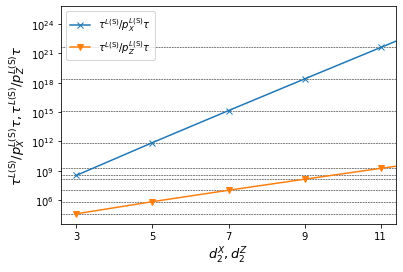

In [86]:
fig, ax = plt.subplots()
code_distance_list = np.array([3,5,7,9,11,13])
cm = plt.get_cmap("tab10")
print(pL_X_5(0.0001,code_distance_list))
ax.plot(code_distance_list, (4*5+6)*code_distance_list /pL_X_5(0.0001,code_distance_list)[0],marker='x',label=r"$\tau^{L(\rm{S})}/p_{X}^{L(\rm{S})}\tau$")
ax.plot(code_distance_list, (4*5+6)*code_distance_list /pL_Z_5(0.0001,code_distance_list),marker='v',label=r"$\tau^{L(\rm{S})}/p_{Z}^{L(\rm{S})}\tau$")
for i in range(len(code_distance_list)-1):
    plt.hlines([(4*5+6)*code_distance_list[i] /pL_X_5(0.0001,code_distance_list[i])[0]], 0, 12, "k", linestyles='dashed',linewidth=0.5)
    plt.hlines([(4*5+6)*code_distance_list[i] /pL_Z_5(0.0001,code_distance_list[i])[0]], 0, 12, "k", linestyles='dashed',linewidth=0.5)
ax.set_xlabel(r"$d_2^X, d_2^Z$", fontsize=13)
ax.set_ylabel(r'$\tau^{L(\rm{S})}/p_{X}^{L(\rm{S})}\tau, \tau^{L(\rm{S})}/p_{Z}^{L(\rm{S})}\tau$', fontsize=13)
ax.set_xticks(code_distance_list)
ax.set_yscale("log")
ax.set_xlim(2.6, 11.4)
ax.legend()
plt.show()

[ 113.  205.  297.  389.  481.  861. 1025.]
[4.10502339e+04 7.14762971e+05 1.04541262e+07 1.40420291e+08
 3.43426440e+08 1.79298933e+09 2.21373703e+10]


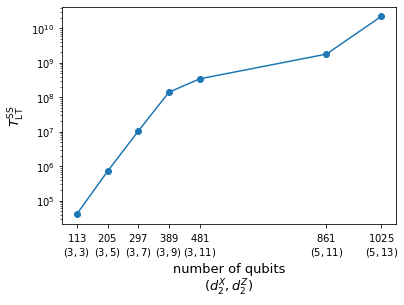

In [396]:
cd_list =[[3,3],[3,5],[3,7],[3,9],[3,11],[5,11],[5,13]]
lifetime_list = np.array([])
number_list = np.array([])
def qubits_number(d1,dx,dz):
    return dx + dz - 1 + (2*d1 -1)*(2*dx*dz-dx-dz)
for cd in cd_list:
    a = (4*5+6)*cd[0] /pL_X_5(0.0001,cd[0])[0,0]
    b = (4*5+6)*cd[1] /pL_Z_5(0.0001,cd[1])[0]
    lifetime_list = np.append(lifetime_list,min(a,b))
    number_list = np.append(number_list,qubits_number(5,cd[0],cd[1]))
print(number_list)
print(lifetime_list)
fig, ax = plt.subplots()
ax.plot(number_list, lifetime_list,marker='o')
ax.set_xlabel(r"number of qubits"+"\n"+r"$(d^{X}_{2},d^{Z}_{2})$", fontsize=13)
ax.set_ylabel(r'$T_{\mathrm{LT}}^{\mathrm{SS}}$', fontsize=13)
ax.set_xticks(number_list)
ax.set_xticklabels([r"$113$"+"\n"+r"$(3,3)$",r"$205$"+"\n"+r"$(3,5)$",r"$297$"+"\n"+r"$(3,7)$",r"$389$"+"\n"+r"$(3,9)$",
                    r"$481$"+"\n"+r"$(3,11)$",r"$861$"+"\n"+r"$(5,11)$",r"$1025$"+"\n"+r"$(5,13)$"])
ax.set_yscale("log")
#ax.set_xlim(2.6, 11.4)
#ax.legend()
plt.show()

[0.00059614] [0.08314032]


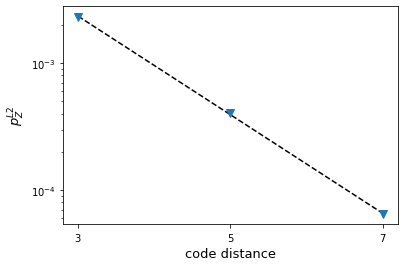

In [49]:
# FUjii-labのパス
path = "/Users/konohideki/Documents/Fujii-lab/surface_realistic/realistic_single_round/SWAP/d1=7,N=1,eta=1000"
# ファイル名
file2 = "Z error,N=1,d2=(3,7,2),eta=1000,trials=400000,ver0re" + ".csv"
########################################

# csvファイルの読み込み
os.chdir(path)
data2 = pd.read_csv(file2, index_col=0)

# データフレームの行名(リスト)を取得
code_distance_list = data2.index[0:3]
p_list = data2.iloc[:,0][0:3]

# fitting
from sklearn import linear_model
clf = linear_model.LinearRegression()
X = np.array(code_distance_list).reshape(-1, 1)
Y = np.log10(p_list)
clf.fit(X, Y)
predict_p = clf.predict([[3],[7]]) 
# モデルの決定
a = clf.coef_
p_th = 10**(-4) / 10**(2*a)
b = clf.intercept_
C = 10**(b-a)
print(p_th, C)
# この式の関数を定義
def pL_Z_7(p,code_distance,p_th=p_th,C=C):
    return C*(p/p_th)**((code_distance+1)/2)

##### グラフ作成 #####
fig, ax = plt.subplots()
ax.plot([3,7],10**predict_p,marker='',linestyle="dashed",color="k")
ax.plot(code_distance_list,p_list,marker='v',linewidth=0,markersize=8)
ax.set_xlabel(r"code distance", fontsize=13)
ax.set_ylabel(r'$p_Z^{L2}$', fontsize=13)
ax.xaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
ax.ticklabel_format(style="sci",  axis="x",scilimits=(0,0))
ax.yaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
ax.ticklabel_format(style="sci",  axis="y",scilimits=(0,0))
ax.set_xticks(code_distance_list)
ax.set_yscale("log")

[[2.43518121e-07 1.31044620e-10 7.05191564e-14 3.79485355e-17
  2.04212787e-20 1.09893207e-23]]


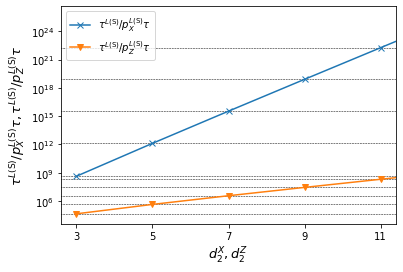

In [87]:
fig, ax = plt.subplots()
code_distance_list = np.array([3,5,7,9,11,13])
cm = plt.get_cmap("tab10")
print(pL_X_7(0.0001,code_distance_list))
ax.plot(code_distance_list, (4*7+6)*code_distance_list /pL_X_7(0.0001,code_distance_list)[0],marker='x',label=r"$\tau^{L(\rm{S})}/p_{X}^{L(\rm{S})}\tau$")
ax.plot(code_distance_list, (4*7+6)*code_distance_list /pL_Z_7(0.0001,code_distance_list),marker='v',label=r"$\tau^{L(\rm{S})}/p_{Z}^{L(\rm{S})}\tau$")
for i in range(len(code_distance_list)-1):
    plt.hlines([(4*7+6)*code_distance_list[i] /pL_X_7(0.0001,code_distance_list[i])[0]], 0, 12, "k", linestyles='dashed',linewidth=0.5)
    plt.hlines([(4*7+6)*code_distance_list[i] /pL_Z_7(0.0001,code_distance_list[i])[0]], 0, 12, "k", linestyles='dashed',linewidth=0.5)
ax.set_xlabel(r"$d_2^X, d_2^Z$", fontsize=13)
ax.set_ylabel(r'$\tau^{L(\rm{S})}/p_{X}^{L(\rm{S})}\tau, \tau^{L(\rm{S})}/p_{Z}^{L(\rm{S})}\tau$', fontsize=13)
ax.set_xticks(code_distance_list)
ax.set_yscale("log")
ax.set_xlim(2.6, 11.4)
ax.legend()
plt.show()

[ 161.  293.  425.  557.  689.  821. 1473.]
[4.36000633e+04 4.33196741e+05 3.61545140e+06 2.77112623e+07
 2.01909055e+08 4.18860000e+08 1.42251147e+09]


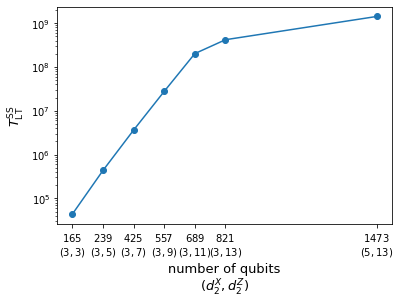

In [389]:
cd_list =[[3,3],[3,5],[3,7],[3,9],[3,11],[3,13],[5,13]]
lifetime_list = np.array([])
number_list = np.array([])
def qubits_number(d1,dx,dz):
    return dx + dz - 1 + (2*d1 -1)*(2*dx*dz-dx-dz)
for cd in cd_list:
    a = (4*7+6)*cd[0] /pL_X_7(0.0001,cd[0])[0,0]
    b = (4*7+6)*cd[1] /pL_Z_7(0.0001,cd[1])[0]
    lifetime_list = np.append(lifetime_list,min(a,b))
    number_list = np.append(number_list,qubits_number(7,cd[0],cd[1]))
print(number_list)
print(lifetime_list)
fig, ax = plt.subplots()
ax.plot(number_list, lifetime_list,marker='o')
ax.set_xlabel(r"number of qubits"+"\n"+r"$(d^{X}_{2},d^{Z}_{2})$", fontsize=13)
ax.set_ylabel(r'$T_{\mathrm{LT}}^{\mathrm{SS}}$', fontsize=13)
ax.set_xticks(number_list)
ax.set_xticklabels([r"$161$"+"\n"+r"$(3,3)$",r"$293$"+"\n"+r"$(3,5)$",r"$425$"+"\n"+r"$(3,7)$",r"$557$"+"\n"+r"$(3,9)$",
                    r"$689$"+"\n"+r"$(3,11)$",r"$821$"+"\n"+r"$(3,13)$",r"$1473$"+"\n"+r"$(5,13)$"])
ax.set_yscale("log")
#ax.set_xlim(2.6, 11.4)
#ax.legend()
plt.show()

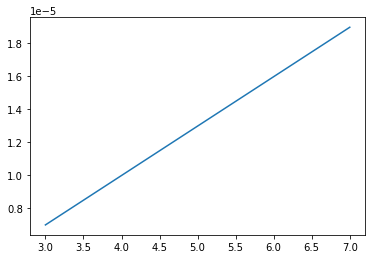

In [380]:
def pg_Z(p,eta,cd_rep):
    return 1/2 * (1-(1-2*p*(2*eta+1)/(2*(eta+1)))**(3*cd_rep-2))
def pg_X(p,eta,cd_rep):
    return 1/2 * (1-(1-2*p/(eta+1))**(3*cd_rep-2))
def p_matrix(p,eta,round_rep,cd_rep):
    matrix = []
    ### 反復符号(なし)
    matrix.append(10e-20) #pL_x(反復符号はゼロ)
    matrix.append(10e-20) #pL_z(反復符号はゼロ)
    ### Zシンドローム測定
    matrix.append(2 * p / (eta+1)) # pg_c_x
    matrix.append(pg_Z(p,eta,cd_rep)) # pg_c_z
    matrix.append(cd_rep*p/(eta+1)) # pg_t_x
    matrix.append((2*eta+1)*p/(2*(eta+1))) #pg_t_z
    ### Xシンドローム測定
    matrix.append(pg_X(p,eta,cd_rep)) # pg_c_x
    matrix.append(2*(2*eta+1)*p/(2*(eta+1))) # pg_c_z
    matrix.append(p/(eta+1)) # pg_t_x
    matrix.append(cd_rep*(2*eta+1)*p/(2*(eta+1))) #pg_t_z
    ### ただのエラー
    matrix.append(1/(eta+1)*p) # p_x
    matrix.append((2*eta+1)/(2*(eta+1))*p) # p_z
    return matrix

p = 0.001
eta = 1000
cd_rep_list = [3,5,7]
p_list = []
for cd_rep in cd_rep_list:
    p_list.append(pg_X(p,eta,cd_rep))
plt.plot(cd_rep_list, p_list)